# ARIMA_model

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df=pd.read_csv("C:\\Users\\Krishna\\Desktop\\dataset\\shampoo.csv")
df.head()

,Month,Sales
0,01-01,266.0
1,01-02,145.9
2,01-03,183.1
3,01-04,119.3
4,01-05,180.3


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Month   36 non-null     object 
 1   Sales   36 non-null     float64
dtypes: float64(1), object(1)
memory usage: 704.0+ bytes


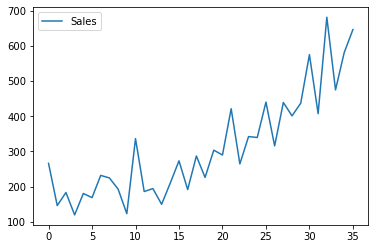

In [8]:
df.plot()

In [9]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df.Sales)
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

It is not stationary


In [10]:
df_diff1=df.Sales.diff()
df_diff2=df.Sales.diff().diff()

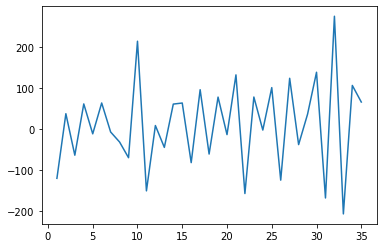

In [11]:
df_diff1.plot()

In [12]:
from statsmodels.tsa.stattools import adfuller
res=adfuller(df_diff2.dropna())
pval=res[1]
if pval<0.05:
    print(" it is stationary")
else:
    print("It is not stationary")

 it is stationary


In [13]:
#d=1

In [14]:
#log order

In [15]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

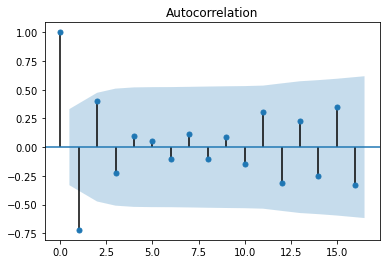

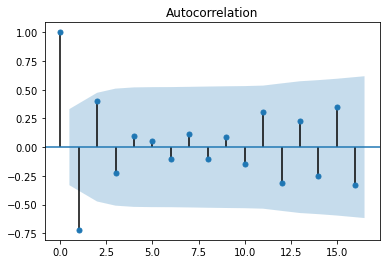

In [16]:
plot_acf(df_diff1.dropna())

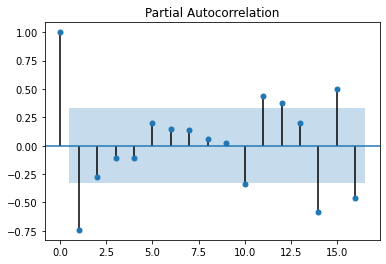

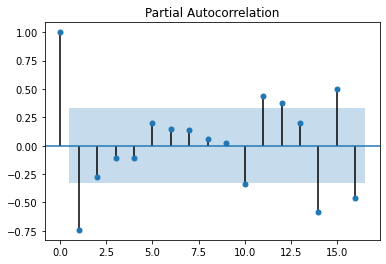

In [17]:
plot_pacf(df_diff1.dropna())

C:\Users\Krishna\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


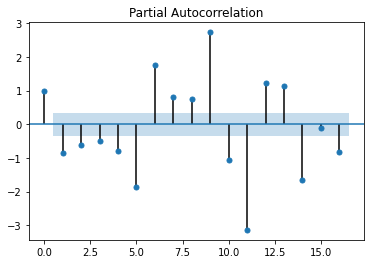

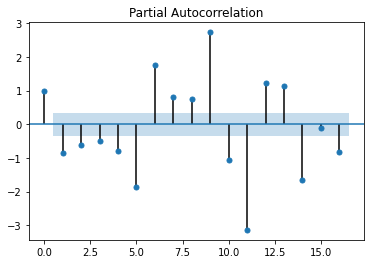

In [18]:
plot_pacf(df_diff2.dropna())

In [19]:
# diff d=1 lag order p-->1

In [20]:
# diff d=2 lag order p-->6,7 q=1

In [21]:
from statsmodels.tsa.arima_model import ARIMA

In [22]:
model=ARIMA(df.Sales,order=(1,1,2))
m=model.fit(disp=0)

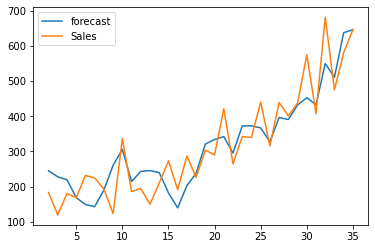

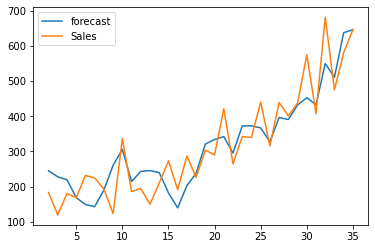

In [23]:
m.plot_predict(dynamic=False)

In [50]:
m.resid

1    -130.382311
2     -61.989555
3    -108.433312
4     -39.185363
5      -0.091959
6      82.916876
7      81.681277
8       2.986574
9    -137.659161
10     30.746692
11    -28.324580
12    -48.975486
13    -95.983541
14    -29.731554
15     91.058021
16     52.075976
17     84.501058
18    -11.895413
19    -17.363291
20    -43.957380
21     79.291328
22    -30.768864
23    -30.264076
24    -33.379408
25     73.493359
26    -11.476377
27     42.827349
28     10.329923
29      5.148915
30    122.670493
31    -25.360933
32    131.926200
33    -35.920205
34    -56.747888
35      0.227204
dtype: float64

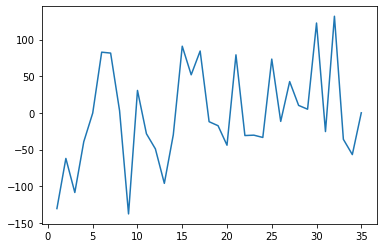

In [51]:
m.resid.plot()

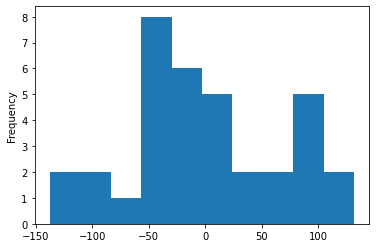

In [54]:
m.resid.plot(kind="hist")

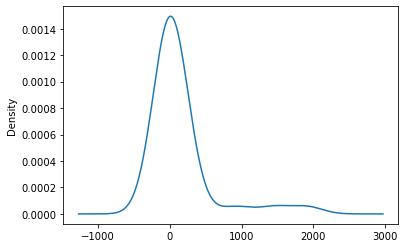

In [46]:
m.resid.plot(kind="kde")